In [15]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Activation
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import pandas as pd
import numpy as np

In [2]:
data_fram = pd.read_csv('data/Features.csv')

In [3]:
data_fram.head()

,dates,OBJs,ODs_1,ODs_2,depTimes,expPerf,staticPerf,grdyPerf,godPerf,distances,...,stmutC_grdyPath_3,YesterdayGrdyPerf,YesterdayGodPerf,YesterdayStaPerf,YesterdayExpPerf,Outputs14,Outputs7,Outputs3_1,Outputs3_2,Outputs3_3
0,4.19,1,1386,1821,16454,901.873155,943.341039,879.878944,802.674362,0.089257,...,0.475829,999.074209,955.166635,997.787702,986.738929,13,6,-1,0,-1
1,4.19,1,529,1199,14062,905.320230,650.077643,650.077643,650.077643,0.053294,...,0.550532,667.675168,585.119637,655.264699,585.119637,2,2,1,1,-1
2,4.19,1,716,990,13779,787.775655,864.166706,925.812156,767.183548,0.080272,...,0.756983,612.851744,601.668111,975.484821,700.256755,14,7,-1,-1,0
3,4.19,1,547,1456,14027,625.313098,683.213117,670.375942,623.874198,0.063568,...,0.512717,670.883400,641.749020,670.883400,641.749020,14,7,-1,-1,0
4,4.19,1,914,1073,14355,604.748398,618.476141,620.277530,595.945774,0.047176,...,0.289439,590.331899,590.331899,657.448103,611.118098,14,7,-1,-1,0


In [4]:
data_fram.drop(['dates', 'OBJs', 'ODs_1', 'ODs_2', 'depTimes'], axis=1, inplace=True)
data_fram.head()

,expPerf,staticPerf,grdyPerf,godPerf,distances,CR_staPath,CR_expPath,CR_godPath,CR_grdyPath,averObjValue_staPath,...,stmutC_grdyPath_3,YesterdayGrdyPerf,YesterdayGodPerf,YesterdayStaPerf,YesterdayExpPerf,Outputs14,Outputs7,Outputs3_1,Outputs3_2,Outputs3_3
0,901.873155,943.341039,879.878944,802.674362,0.089257,38,36,33,34,1002.583614,...,0.475829,999.074209,955.166635,997.787702,986.738929,13,6,-1,0,-1
1,905.320230,650.077643,650.077643,650.077643,0.053294,14,11,11,10,691.118469,...,0.550532,667.675168,585.119637,655.264699,585.119637,2,2,1,1,-1
2,787.775655,864.166706,925.812156,767.183548,0.080272,22,18,18,17,981.840365,...,0.756983,612.851744,601.668111,975.484821,700.256755,14,7,-1,-1,0
3,625.313098,683.213117,670.375942,623.874198,0.063568,11,11,11,11,704.890220,...,0.512717,670.883400,641.749020,670.883400,641.749020,14,7,-1,-1,0
4,604.748398,618.476141,620.277530,595.945774,0.047176,18,18,17,17,644.648402,...,0.289439,590.331899,590.331899,657.448103,611.118098,14,7,-1,-1,0


In [5]:
Data = data_fram.as_matrix()
X = Data[:, 4:125].astype(float)
Y = Data[:, :4]

D:\Anaconda3\envs\machinelearn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=32, test_size=0.2)

In [7]:
from sklearn.preprocessing import minmax_scale
X_train_std = minmax_scale(x_train)
X_test_std = minmax_scale(x_test)
#X_train_std = standar_s.fit_transform(x_train)
#X_test_std = standar_s.fit_transform(x_test)

In [9]:
def create_model_1():
    model = Sequential()
    model.add(Dense(units=1024, kernel_initializer='random_normal',input_dim=X_train_std.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=512, kernel_initializer='random_normal'))
    model.add(Activation('relu'))
    model.add(Dense(units=256, kernel_initializer='random_normal'))
    model.add(Activation('relu'))
    model.add(Dense(units=32, kernel_initializer='random_normal'))
    model.add(Activation('relu'))
    model.add(Dense(units=4))
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mae'])
    return model

In [10]:
a_model_1 = create_model_1()

In [14]:
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
a_model_1.fit(X_train_std,y_train,batch_size=64,epochs=5,validation_split=0.2,shuffle=True,
              callbacks=[TensorBoard(log_dir='./logs/{}'.format("同时预测_3")),
                        ModelCheckpoint(filepath='sanme_time_model_3.hdf5', monitor='val_acc', mode='auto', save_best_only='True')
                     ])

Train on 65228 samples, validate on 16307 samples
Epoch 1/5
65228/65228 [==============================] - 21s 321us/step - loss: 13538.1905 - mean_absolute_error: 82.1542 - val_loss: 12392.3967 - val_mean_absolute_error: 79.1224
Epoch 2/5
  640/65228 [..............................] - ETA: 18s - loss: 12637.4562 - mean_absolute_error: 77.4495

D:\Anaconda3\envs\machinelearn\lib\site-packages\keras\callbacks.py:432: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


65228/65228 [==============================] - 23s 357us/step - loss: 13270.5898 - mean_absolute_error: 81.2639 - val_loss: 14139.9334 - val_mean_absolute_error: 82.7673
Epoch 3/5
65228/65228 [==============================] - 23s 348us/step - loss: 13367.2519 - mean_absolute_error: 81.5978 - val_loss: 12442.2043 - val_mean_absolute_error: 78.6329
Epoch 4/5
65228/65228 [==============================] - 23s 353us/step - loss: 13352.6338 - mean_absolute_error: 81.6605 - val_loss: 12325.6029 - val_mean_absolute_error: 78.6573
Epoch 5/5
65228/65228 [==============================] - 22s 331us/step - loss: 13247.8769 - mean_absolute_error: 81.3307 - val_loss: 13282.0206 - val_mean_absolute_error: 80.4085


In [13]:
a_model_1.save('sanme_time_model_1.hdf5')

In [16]:
a_model_1 = load_model('sanme_time_model_1.hdf5')

In [17]:
a_model_1.evaluate(X_test_std,y_test)

20384/20384 [==============================] - 1s 61us/step


[17610.96771671409, 94.12304631207763]

# 评估函数

In [18]:
pred_y = a_model_1.predict(X_test_std)
pred_y.shape

(20384, 4)

In [19]:
y_test.shape

(20384, 4)

In [20]:
pred_y = pred_y[:,:-1]
y_test = y_test[:,:-1]

In [21]:
pred_y.shape

(20384, 3)

In [22]:
pred_y[:10]

array([[1241.5509 , 1319.9374 , 1269.0323 ],
       [ 599.5573 ,  611.12006,  606.10046],
       [ 452.7318 ,  468.24078,  450.9761 ],
       [2161.0093 , 2287.1296 , 2153.5337 ],
       [ 321.174  ,  322.893  ,  322.23697],
       [1770.2662 , 1804.764  , 1782.2668 ],
       [1400.8785 , 1448.3877 , 1429.4009 ],
       [1481.9287 , 1572.97   , 1530.2032 ],
       [3025.093  , 3151.253  , 2983.784  ],
       [ 891.631  ,  942.3945 ,  914.44165]], dtype=float32)

In [23]:
y_test[:10]

array([[1162.102453 , 1230.058085 , 1130.901853 ],
       [ 584.2194133,  584.2194133,  671.7974949],
       [ 460.8610267,  491.6431113,  475.0605209],
       [2013.833367 , 2107.497762 , 1968.842429 ],
       [ 418.4396007,  418.4396007,  424.092712 ],
       [1581.096673 , 1587.709253 , 1713.614745 ],
       [1267.163825 , 1415.935566 , 1278.598199 ],
       [1360.806735 , 1457.265915 , 1437.216663 ],
       [2565.988519 , 2798.710071 , 2485.731319 ],
       [ 899.0938844,  913.8069544,  864.1062196]])

In [24]:
type(pred_y)

numpy.ndarray

### ndarray 转换成 datafram

In [25]:
import pandas as pd

In [26]:
pred_y_df = pd.DataFrame(pred_y)

In [28]:
y_test_df = pd.DataFrame(y_test)

In [29]:
pred_y_df.to_csv('y_test_pred.csv')

In [30]:
y_test_df.to_csv('y_test.csv')

# 分析 y_test 与 pred_y 数据关系

In [31]:
np.min(y_test[:10],axis=1)

array([1130.901853 ,  584.2194133,  460.8610267, 1968.842429 ,
        418.4396007, 1581.096673 , 1267.163825 , 1360.806735 ,
       2485.731319 ,  864.1062196])

In [32]:
y_test[1]

array([584.2194133, 584.2194133, 671.7974949])

In [33]:
np.where(pred_y[0]==np.min(pred_y[0]))

(array([0], dtype=int64),)

In [34]:
y_test[0][0]

1162.102453

In [35]:
def evaluate_function(pred_y, y_test, threshold):
    cout_num = 0
    accord_threshold = 0
    for idx in range(pred_y.shape[0]):
        if(np.max(y_test[idx]) - np.min(y_test[idx]))<= threshold:
            accord_threshold +=1
            cout_num+=1
        else:
            A,B,C = y_test[idx][0],y_test[idx][1],y_test[idx][2]
            if (A<=B and B<=C) or (A<=C and C<=B):
                if np.min(pred_y[idx]) == pred_y[idx][0]:
                    cout_num+=1
            elif (B<=A and A<=C) or (B<=C and C<=A):
                if np.min(pred_y[idx]) == pred_y[idx][1]:
                    cout_num+=1
            elif (C<=A and A<=B) or (C<=B and B<=A):
                if np.min(pred_y[idx]) == pred_y[idx][2]:
                    cout_num+=1
    return accord_threshold/pred_y.shape[0],cout_num/pred_y.shape[0]
    

In [36]:
evaluate_function(pred_y,y_test,20)

(0.2315541601255887, 0.6146487441130298)

In [37]:
out_list_0 = []
out_list_1 = []
for t in range(0,200, 5):
    out_list_0.append(evaluate_function(pred_y,y_test, t)[0]) 
    out_list_1.append(evaluate_function(pred_y,y_test, t)[1]) 

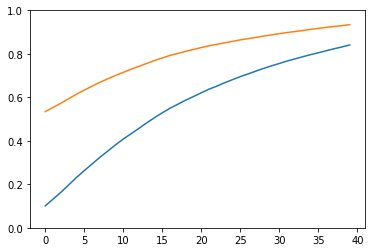

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylim(0,1)
plt.plot(range(len(out_list_0)), out_list_0,out_list_1)

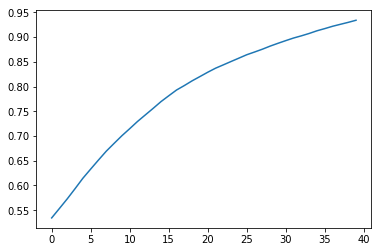

In [39]:
plt.plot(range(len(out_list_1)), out_list_1)

In [40]:
out_list_1

[0.5344387755102041,
 0.5536695447409733,
 0.5730474882260597,
 0.5936028257456829,
 0.6146487441130298,
 0.6331927001569859,
 0.6514913657770801,
 0.6693975667189953,
 0.6850961538461539,
 0.7005985086342229,
 0.7148253532182104,
 0.7293956043956044,
 0.7426412872841445,
 0.7558379120879121,
 0.7694270015698587,
 0.7812990580847724,
 0.7929748822605965,
 0.8020015698587127,
 0.8115678963893249,
 0.8202021193092621,
 0.8289344583987441,
 0.8370781004709577,
 0.8438481161695447,
 0.8507162480376766,
 0.8574862637362637,
 0.8643053375196232,
 0.8697998430141287,
 0.8754905808477237,
 0.8817700156985872,
 0.8874116954474097,
 0.8928571428571429,
 0.8981063579277865,
 0.9025215855572999,
 0.9073292778649922,
 0.9127256671899528,
 0.9171408948194663,
 0.9218504709576139,
 0.9258241758241759,
 0.9297488226059655,
 0.9340168759811617]